# NYC Property Sales

## Introduction

## Import Libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import datetime

## Load and Review Dataset

In [3]:
df_sales = pd.read_csv('E:\Cool Yeah\Hacktiv8\Property Sales\Data\sales.csv')

In [4]:
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
df_sales.shape

(84548, 22)

## Data Cleanup

Pertama kita hapus variabel yang tidak dibutuhkan.

In [7]:
clean_df = df_sales.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1)

Kemudian kita cek tipe tiap variabel.

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

Sekarang, kita lihat apakah ada duplikat pada baris dataset.

In [9]:
sum(clean_df.duplicated())

2751

Seperti yang kita lihat, ada 2751 duplikat, jadi mari kita hapus.

In [10]:
clean_df = clean_df.drop_duplicates()
sum(clean_df.duplicated())

0

Selanjutnya mari kita ganti nilai non-numeric '-' dengan 0, sehingga data numerik akan dinormalisasi.

In [11]:
clean_df.replace(' -  ', 0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Sekarang, kita akan mengganti nilai NaN dengan 0.

In [12]:
clean_df.replace(np.nan, 0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Kita akan menambahkan kolom baru untuk mengubah nilai sale price ke dalam millions of $.

In [13]:
clean_df['SALE_PRICE_IN_M'] = clean_df['SALE PRICE'].astype(np.float64) / 1000000
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE_IN_M
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,6.625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,0.000000
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,0.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,3.936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,0.450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,0.550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,0.460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,11.693337


Selanjutnya mari kita buat kolom baru untuk usia unit.

In [14]:
clean_df['AGE'] = datetime.date.today().year - clean_df['YEAR BUILT'].astype(np.float64)
clean_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE_IN_M,AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,6.625000,123.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,0.000000,123.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,0.000000,123.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,3.936272,110.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,8.000000,123.0


Sekarang kita akan membuat kolom 'SALE_MONTH' yang mewakili bulan penjualan properti.

In [15]:
clean_df['SALE DATE'] = pd.to_datetime(clean_df['SALE DATE'])
clean_df['SALE_MONTH']= clean_df['SALE DATE'].dt.month

clean_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_PRICE_IN_M,AGE,SALE_MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,6.625000,123.0,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,0.000000,123.0,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,0.000000,123.0,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,3.936272,110.0,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,8.000000,123.0,11


Mari kita cek kolom kita.

In [16]:
clean_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'BUILDING CLASS AT PRESENT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'SALE_PRICE_IN_M', 'AGE', 'SALE_MONTH'],
      dtype='object')

Selanjutnya kita cek tingkat korelasi antar kolom.

In [17]:
corr = clean_df.corr().abs()
corr

,BOROUGH,BLOCK,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE_PRICE_IN_M,AGE,SALE_MONTH
BOROUGH,1.000000,0.416093,0.021947,0.005504,0.022034,0.105939,0.319801,0.073121,0.105939,0.002988
BLOCK,0.416093,1.000000,0.014941,0.002810,0.014740,0.071475,0.285547,0.056235,0.071475,0.004922
RESIDENTIAL UNITS,0.021947,0.014941,1.000000,0.016785,0.883587,0.024664,0.000698,0.098048,0.024664,0.010534
COMMERCIAL UNITS,0.005504,0.002810,0.016785,1.000000,0.482950,0.006012,0.049692,0.042270,0.006012,0.005029
TOTAL UNITS,0.022034,0.014740,0.883587,0.482950,1.000000,0.023624,0.027739,0.105653,0.023624,0.011682
YEAR BUILT,0.105939,0.071475,0.024664,0.006012,0.023624,1.000000,0.189453,0.002664,1.000000,0.006274
TAX CLASS AT TIME OF SALE,0.319801,0.285547,0.000698,0.049692,0.027739,0.189453,1.000000,0.082740,0.189453,0.015619
SALE_PRICE_IN_M,0.073121,0.056235,0.098048,0.042270,0.105653,0.002664,0.082740,1.000000,0.002664,0.003236
AGE,0.105939,0.071475,0.024664,0.006012,0.023624,1.000000,0.189453,0.002664,1.000000,0.006274
SALE_MONTH,0.002988,0.004922,0.010534,0.005029,0.011682,0.006274,0.015619,0.003236,0.006274,1.000000


Text(0.5, 1.0, 'Variable Correlation')

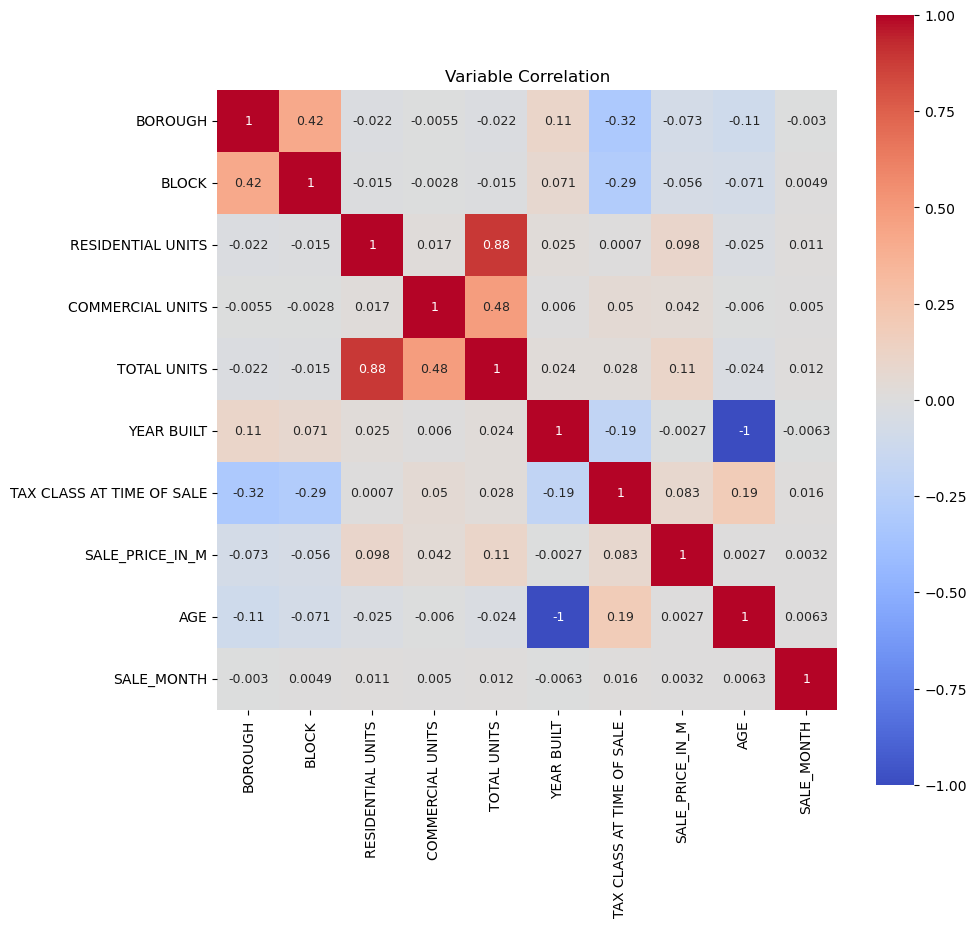

In [18]:
corrmat = clean_df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sbs.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

## Probability Distribution

In [45]:
sale_price = clean_df['SALE_PRICE_IN_M'].groupby([clean_df['TAX CLASS AT TIME OF SALE']]).sum()

In [46]:
count, bin_edges = np.histogram(sale_price)
print(count)
print(bin_edges)

[1 0 0 0 2 0 0 0 0 1]
[    0.        4729.957676  9459.915352 14189.873028 18919.830704
 23649.78838  28379.746056 33109.703732 37839.661408 42569.619084
 47299.57676 ]


<AxesSubplot:ylabel='Frequency'>

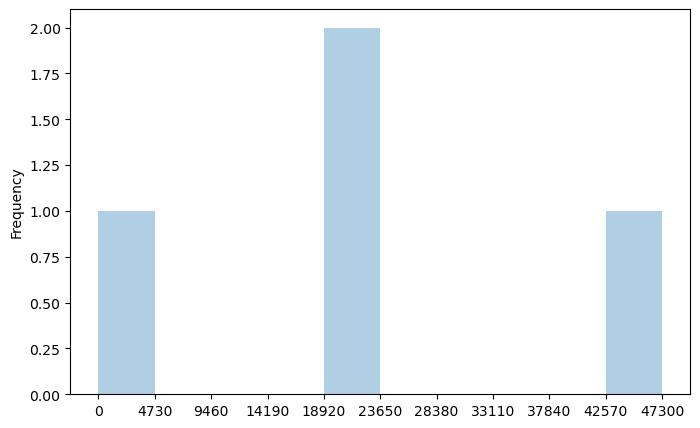

In [47]:
sale_price.plot(
    kind='hist',
    figsize=(8, 5),
    alpha=0.35,
    xticks=bin_edges
)

<AxesSubplot:xlabel='SALE_PRICE_IN_M', ylabel='Count'>

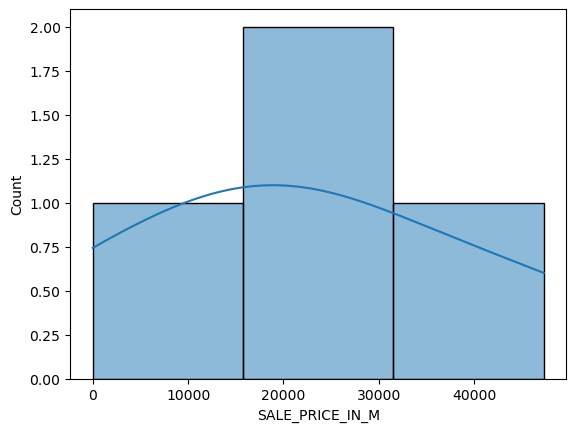

In [80]:
sns.histplot(data=sale_price, kde=True)

## Hypothesis Testing

### Shapiro-Wilk Test

In [49]:
stat, p = scipy.stats.shapiro(sale_price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.957, p=0.758
Probably Gaussian


## Transform

In [111]:
# sale_price.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='SALE_MONTH')

In [112]:
# sale_price.values

array([1.183662  , 0.88669554, 1.00536112, 0.96222151, 1.35188232,
       1.04583514, 1.05625287, 1.10982891, 1.05112329, 0.93561904,
       1.02938382, 1.37497245])

### Mean

In [117]:
# price_mean = clean_df['SALE_PRICE_IN_M'].mean()
# price_mean

1.088340951526365

In [118]:
# clean_df['SALE_PRICE_IN_M'].replace(0.0, price_mean, inplace=True)

In [120]:
# clean_df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,SALE_MONTH,AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,6.625000,7,123.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan,1.088341,12,123.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan,1.088341,12,123.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,3.936272,9,110.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,8.000000,11,123.0
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,C4,20,0,20,2581,9730,1900,2,C4,0,2017-07-20,Manhattan,1.088341,7,123.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,C4,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23,Manhattan,3.192840,9,103.0
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,C7,44,2,46,5163,21007,1900,2,C7,0,2017-07-20,Manhattan,1.088341,7,123.0
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,D5,15,0,15,1534,9198,1920,2,D5,0,2017-06-20,Manhattan,1.088341,6,103.0
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,D9,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07,Manhattan,16.232000,11,103.0


In [67]:
# age_mean = np.mean(sale_price.index)
# age_mean

105.90506329113924

In [100]:
# sale_price = sale_price.replace(0., price_mean)

In [101]:
# sale_price

AGE
6.0      0.145000
7.0      0.840816
8.0      1.367528
9.0      2.167645
10.0     2.908933
           ...   
194.0    1.662121
197.0    1.662121
223.0    1.105059
343.0    1.662121
912.0    8.208750
Name: SALE_PRICE_IN_M, Length: 158, dtype: float64

In [91]:
# sale_price = sale_price.rename({2023.0: 106.0})

In [92]:
# sale_price

AGE
6.0      0.145000
7.0      0.840816
8.0      1.367528
9.0      2.167645
10.0     2.908933
           ...   
197.0    0.000000
223.0    1.105059
343.0    0.000000
912.0    8.208750
106.0    1.197668
Name: SALE_PRICE_IN_M, Length: 158, dtype: float64

In [95]:
# sale_price = sale_price.sort_index()

In [96]:
# sale_price

AGE
6.0      0.145000
7.0      0.840816
8.0      1.367528
9.0      2.167645
10.0     2.908933
           ...   
194.0    0.000000
197.0    0.000000
223.0    1.105059
343.0    0.000000
912.0    8.208750
Name: SALE_PRICE_IN_M, Length: 158, dtype: float64

## Probability Distribution

In [121]:
# sale_price = clean_df['SALE_PRICE_IN_M'].groupby([clean_df['SALE_MONTH']]).mean()

In [122]:
# count, bin_edges = np.histogram(sale_price)
# print(count)
# print(bin_edges)

[1 2 5 1 0 1 0 0 0 2]
[1.20343835 1.25273078 1.30202321 1.35131565 1.40060808 1.44990051
 1.49919295 1.54848538 1.59777782 1.64707025 1.69636268]


<AxesSubplot:ylabel='Frequency'>

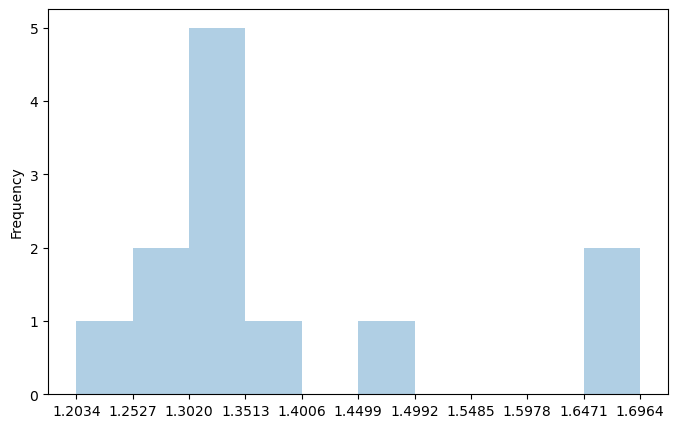

In [123]:
# sale_price.plot(
#     kind='hist',
#     figsize=(8, 5),
#     alpha=0.35,
#     xticks=bin_edges
# )

D:\Application\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE_PRICE_IN_M', ylabel='Density'>

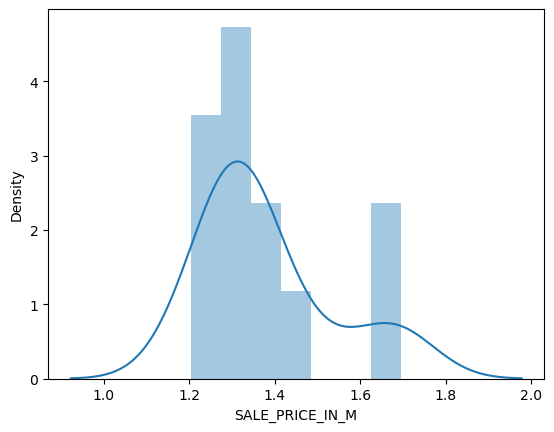

In [125]:
# sbs.distplot(sale_price)

In [126]:
# stat, p = scipy.stats.shapiro(sale_price)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably Gaussian')
# else:
#     print('Probably not Gaussian')

stat=0.818, p=0.015
Probably not Gaussian


## Cofidence Intervals

In [147]:
price_mean

1.088340951526365

In [149]:
price_std = clean_df['SALE_PRICE_IN_M'].std()
price_std

10.554183189637545

In [154]:
price_n = len(clean_df['SALE_PRICE_IN_M'])
price_n

81797

In [155]:
z = 1.96

### Calculate the standard error using the formula for the standard error of the mean

In [157]:
se = price_std / np.sqrt(price_n)

### Construct the CI

In [159]:
lcb = price_mean - z* se # lower limit of the CI
ucb = price_mean + z* se # upper limit of the CI

lcb, ucb

(1.0160120263413783, 1.1606698767113515)

## Mean

In [50]:
df_sales[df_sales['SALE PRICE'] == 0].shape

(10228, 22)

In [54]:
arr_price = np.array(clean_df['SALE_PRICE_IN_M'])
arr_price

array([ 6.625   ,  0.      ,  0.      , ...,  0.46    , 11.693337,
        0.0693  ])

In [56]:
arr_price = clean_df['SALE_PRICE_IN_M'].to_numpy()
arr_price

array([ 6.625   ,  0.      ,  0.      , ...,  0.46    , 11.693337,
        0.0693  ])

### pandas

In [57]:
clean_df['SALE_PRICE_IN_M'].mean()

1.088340951526365

### numpy

In [58]:
mean = np.nanmean(arr_price)
mean

1.0883409515263396

## Median

### pandas

In [60]:
median = clean_df['SALE_PRICE_IN_M'].median()
median

0.432

### numpy

In [61]:
median = np.nanmedian(arr_price)
median

0.432

## Modus

### pandas

In [62]:
mode = clean_df['SALE_PRICE_IN_M'].mode()
mode

0    0.0
Name: SALE_PRICE_IN_M, dtype: float64

### scipy

In [63]:
mode = scipy.stats.mode(arr_price, nan_policy='omit')
mode

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_3280\900576114.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = scipy.stats.mode(arr_price, nan_policy='omit')


ModeResult(mode=array([0.]), count=array([22443]))

In [64]:
print(mode.mode)
print(mode.count)

[0.]
[22443]


## Range

In [65]:
clean_df['SALE_PRICE_IN_M'].max() - clean_df['SALE_PRICE_IN_M'].min()

2210.0

## Variance

In [67]:
clean_df['SALE_PRICE_IN_M'].var(skipna=True, ddof=1)

111.39078280042774

In [69]:
var = np.var(arr_price, ddof=1)
var

111.39078280061217

## Standard Deviation

In [72]:
std = np.std(arr_price, ddof=1)
std

10.554183189646283

In [70]:
std = clean_df['SALE_PRICE_IN_M'].std(ddof=1)
std

10.554183189637545